In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [4]:
path="/content/ab testing.csv"
df=pd.read_csv(path)
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [5]:
print("Data Loaded successfully")

Data Loaded successfully


In [6]:
print("/n--- Data Head ---/n")
df.head()


/n--- Data Head ---/n


,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [7]:
print("/n--- Data Tail ---/n")
df.tail()

/n--- Data Tail ---/n


,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
4995,16360,B,12,313,No,Mobile,Wales
4996,18084,B,10,313,No,Desktop,Northern Ireland
4997,12063,A,11,156,No,Desktop,England
4998,18647,B,13,346,No,Desktop,Wales
4999,16686,A,11,208,No,Desktop,Northern Ireland


In [8]:
GROUP_COL = 'Group'
CONVERSION_COL = 'Conversion'

# Convert 'Conversion' column from 'Yes'/'No' to 1/0
df[CONVERSION_COL] = df[CONVERSION_COL].apply(lambda x: 1 if x == 'Yes' else 0)

# 5. Aggregate Data for A and B groups
conversion_summary = df.groupby(GROUP_COL)[CONVERSION_COL].agg(['sum', 'count']).reset_index()
conversion_summary.columns = [GROUP_COL, 'conversions', 'total_users']

# Extract values for the A (Control) group
conversions_A = conversion_summary[conversion_summary[GROUP_COL] == 'A']['conversions'].values[0]
n_A = conversion_summary[conversion_summary[GROUP_COL] == 'A']['total_users'].values[0]
rate_A = conversions_A / n_A

# Extract values for the B (Treatment) group
conversions_B = conversion_summary[conversion_summary[GROUP_COL] == 'B']['conversions'].values[0]
n_B = conversion_summary[conversion_summary[GROUP_COL] == 'B']['total_users'].values[0]
rate_B = conversions_B / n_B

print("\n--- Summary Statistics ---")
print(f"Group A: {conversions_A} conversions out of {n_A} users. Conversion Rate: {rate_A:.4f}")
print(f"Group B: {conversions_B} conversions out of {n_B} users. Conversion Rate: {rate_B:.4f}")
print(f"Difference in Rates (B - A): {(rate_B - rate_A):.4f}")


--- Summary Statistics ---
Group A: 136 conversions out of 2519 users. Conversion Rate: 0.0540
Group B: 349 conversions out of 2481 users. Conversion Rate: 0.1407
Difference in Rates (B - A): 0.0867


In [9]:
# Extract values for the A (Control) group
conversions_A = conversion_summary[conversion_summary[GROUP_COL] == 'A']['conversions'].values[0]
n_A = conversion_summary[conversion_summary[GROUP_COL] == 'A']['total_users'].values[0]
rate_A = conversions_A / n_A

In [10]:
# Extract values for the B (Treatment) group
conversions_B = conversion_summary[conversion_summary[GROUP_COL] == 'B']['conversions'].values[0]
n_B = conversion_summary[conversion_summary[GROUP_COL] == 'B']['total_users'].values[0]
rate_B = conversions_B / n_B

In [11]:
print("\n--- Summary Statistics ---")
print(f"Group A: {conversions_A} conversions out of {n_A} users. Conversion Rate: {rate_A:.4f}")
print(f"Group B: {conversions_B} conversions out of {n_B} users. Conversion Rate: {rate_B:.4f}")
print(f"Difference in Rates (B - A): {(rate_B - rate_A):.4f}")


--- Summary Statistics ---
Group A: 136 conversions out of 2519 users. Conversion Rate: 0.0540
Group B: 349 conversions out of 2481 users. Conversion Rate: 0.1407
Difference in Rates (B - A): 0.0867


In [12]:
# 6. Set Significance Level (Alpha)
alpha = 0.05 # Standard significance level

# 7. Perform the Z-test for Two Proportions
# We pass the counts of successes (conversions) and the counts of trials (total users)
count = np.array([conversions_B, conversions_A])
nobs = np.array([n_B, n_A])

# 'value=0' means H0: p_B - p_A = 0
# 'alternative="two-sided"' means H1: p_B - p_A != 0
z_stat, p_value = proportions_ztest(count, nobs, value=0, alternative='two-sided')

print("\n--- Z-Test Results ---")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance Level (alpha): {alpha}")

# 8. Draw Conclusion
print("\n--- Conclusion ---")
if p_value < alpha:
    print(f"The P-value ({p_value:.4f}) is less than alpha ({alpha}).")
    print("**Conclusion: Reject the Null Hypothesis.** There is a statistically significant difference in conversion rates between Group A and Group B.")
    if rate_B > rate_A:
        print("Specifically, Group B (Treatment) performed better than Group A (Control).")
    else:
        print("Specifically, Group A (Control) performed better than Group B (Treatment).")
else:
    print(f"The P-value ({p_value:.4f}) is greater than alpha ({alpha}).")
    print("**Conclusion: Fail to Reject the Null Hypothesis.** There is no statistically significant difference in conversion rates between Group A and Group B.")


--- Z-Test Results ---
Z-statistic: 10.3545
P-value: 0.0000
Significance Level (alpha): 0.05

--- Conclusion ---
The P-value (0.0000) is less than alpha (0.05).
**Conclusion: Reject the Null Hypothesis.** There is a statistically significant difference in conversion rates between Group A and Group B.
Specifically, Group B (Treatment) performed better than Group A (Control).


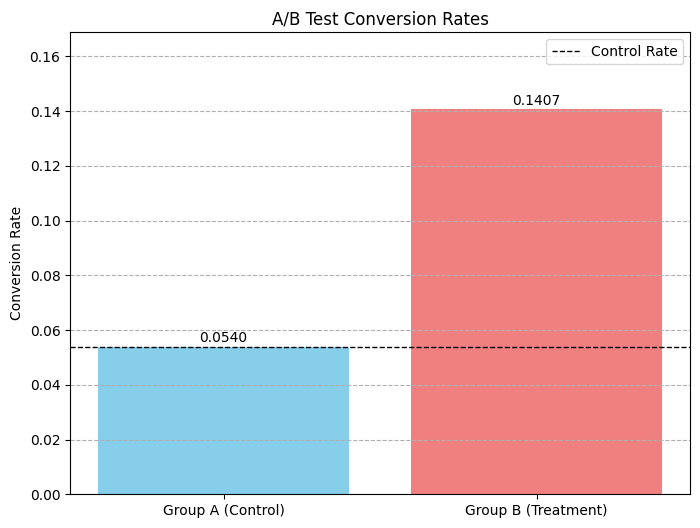

In [13]:
# 9. Visualization of Conversion Rates
rates = [rate_A, rate_B]
groups = ['Group A (Control)', 'Group B (Treatment)']

plt.figure(figsize=(8, 6))
bars = plt.bar(groups, rates, color=['skyblue', 'lightcoral'])
plt.ylabel('Conversion Rate')
plt.title('A/B Test Conversion Rates')
plt.ylim(0, max(rates) * 1.2) # Set y-axis limit

# Add the rate values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, f'{yval:.4f}', ha='center', va='bottom')

plt.axhline(rate_A, color='black', linestyle='--', linewidth=1, label='Control Rate') # Reference line
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()